In [7]:
# Credit Card Fraud Detection (Random Forest)
#A small ML project using a Random Forest classifier to detect fraudulent transactions.


In [41]:
import pandas as pd 
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, confusion_matrix , roc_auc_score

In [9]:
dataset = pd.read_csv("creditcard.csv")


In [10]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
dataset['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [93]:
dataset.shape

(284807, 31)

In [5]:
null_values = ((dataset.isnull().sum()/len(dataset)) *100) 
len(null_values[null_values<0])

0

Class
0    284315
1       492
Name: count, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

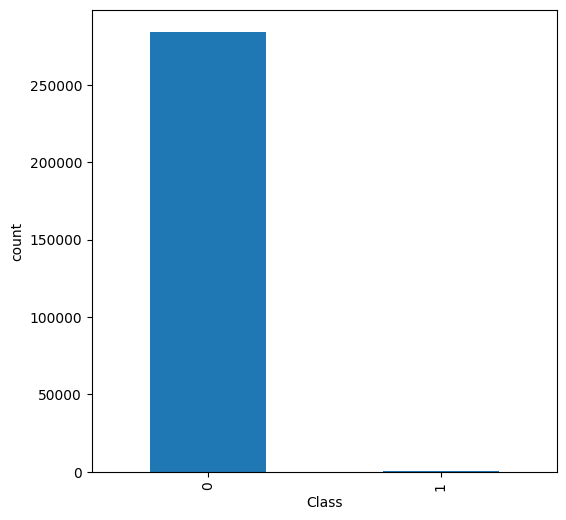

In [13]:
# check the data balance and visualise
data_balance = dataset["Class"].value_counts()
print(data_balance)
plt.figure(figsize=(6,6))
plt.xlabel("Class")
plt.ylabel("count")
data_balance.plot(kind='bar')

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

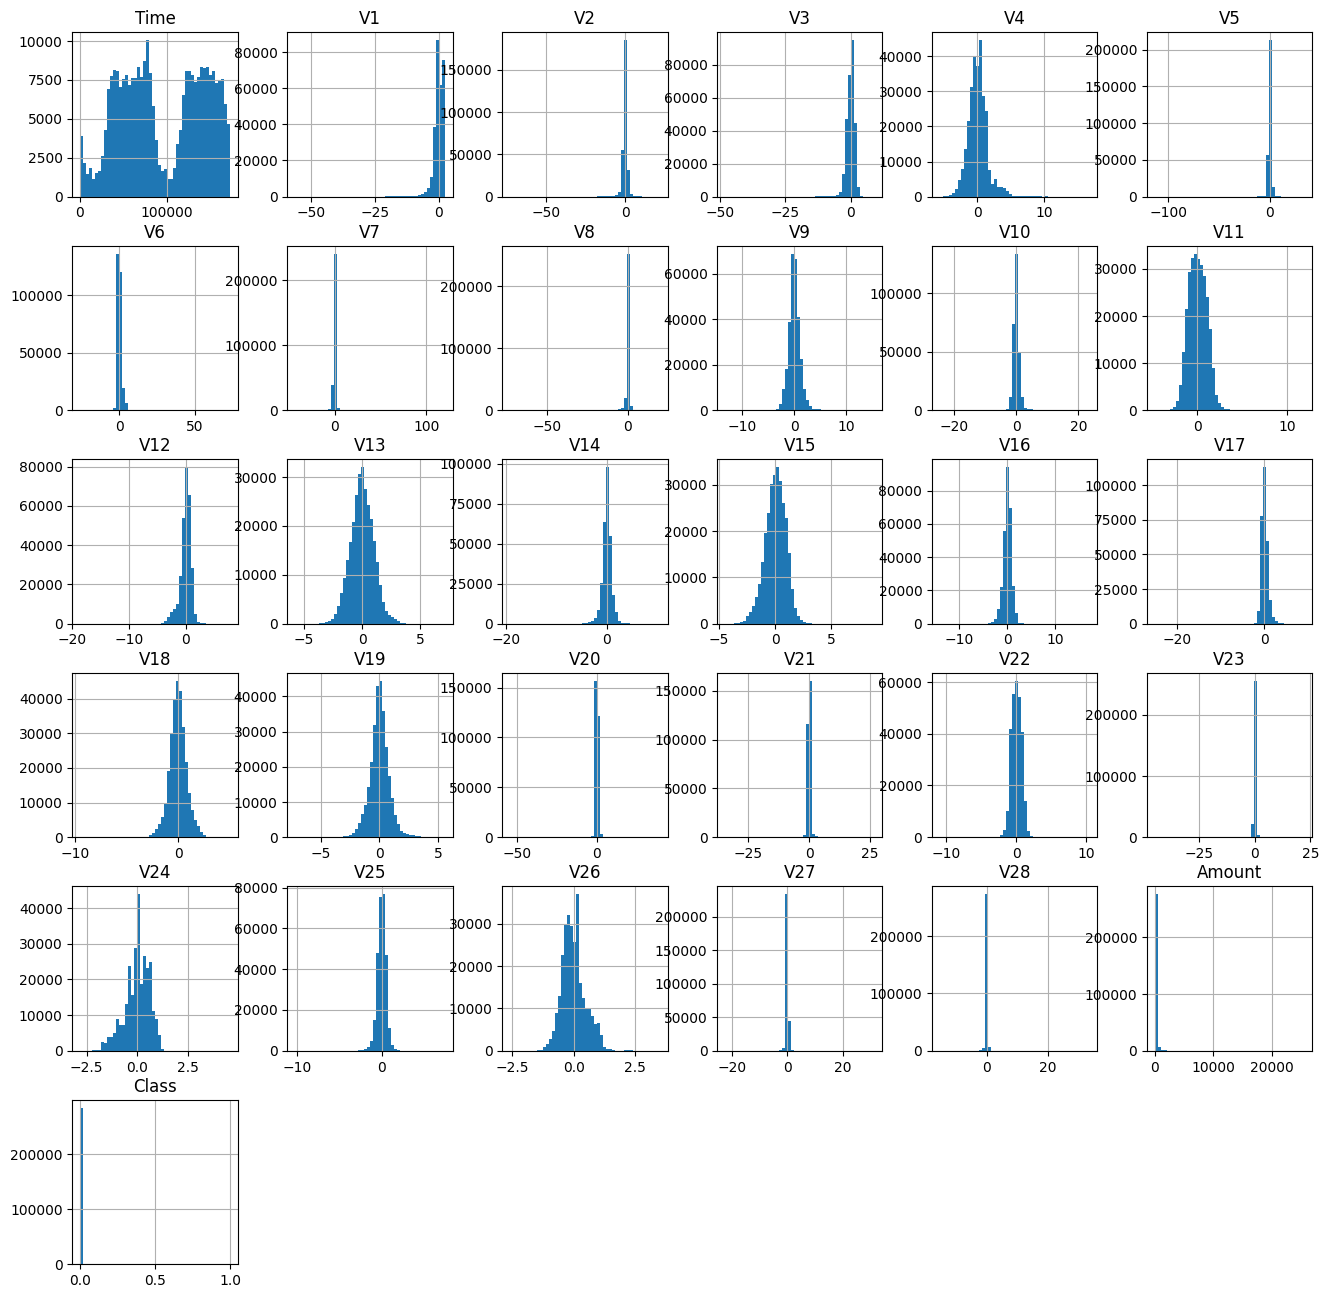

In [12]:
dataset.hist(figsize=(16,16),bins=50)

<Axes: >

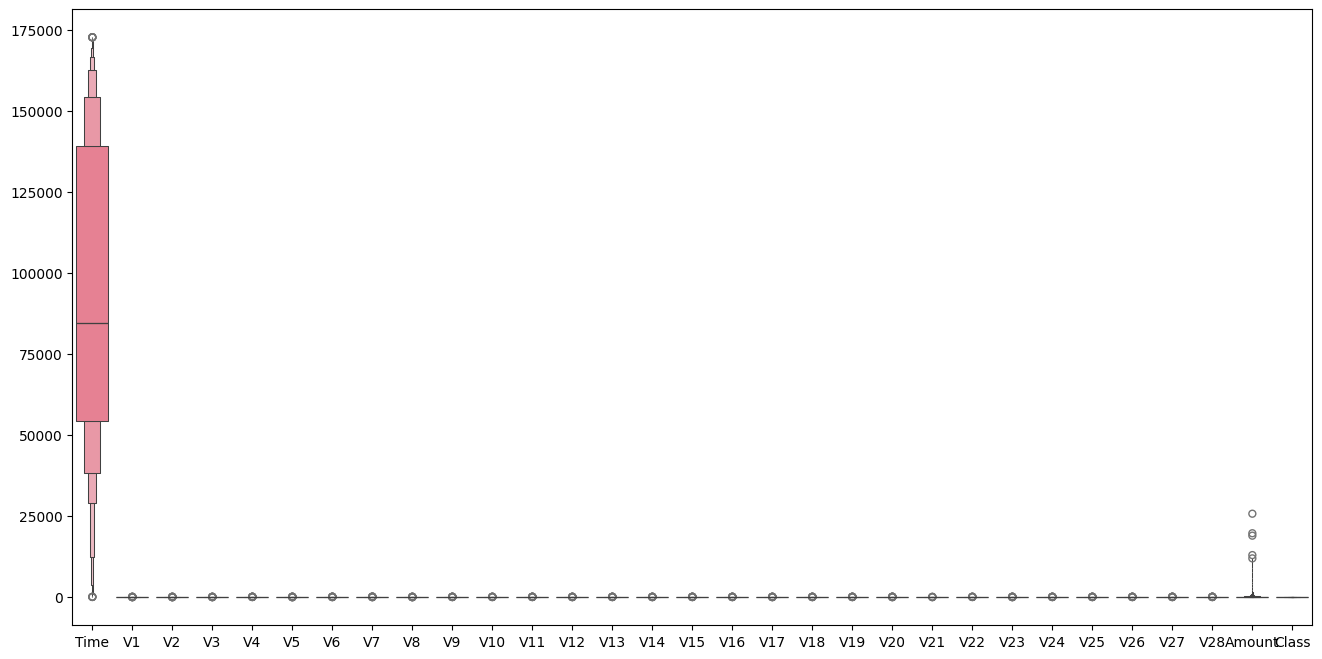

In [97]:
plt.figure(figsize=(16,8))
sns.boxenplot(data=dataset)

<Axes: xlabel='Time'>

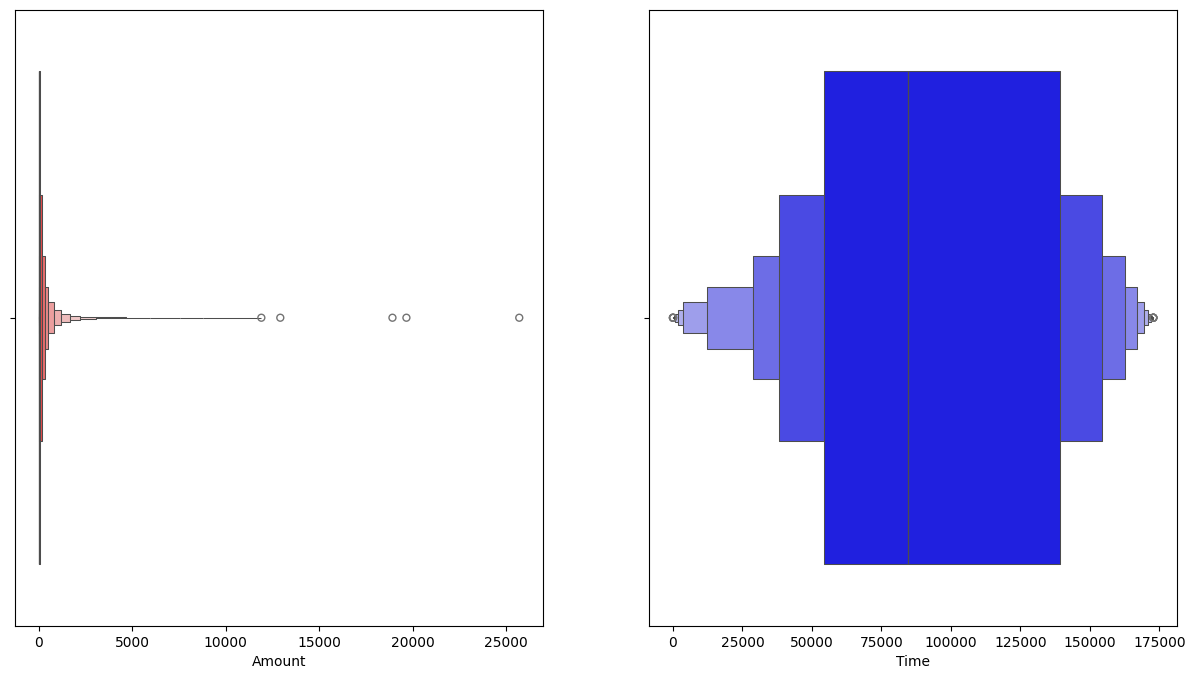

In [98]:
fig, ax = plt.subplots(1,2,figsize=(15,8))
sns.boxenplot(x=dataset['Amount'],color='red',ax=ax[0])
sns.boxenplot(x=dataset['Time'],color='blue')

In [14]:
# we will use all the features, we will split the data and trian RF

x = dataset.drop(['Class','Time'],axis=1)
y = dataset['Class']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2) 
print(f"Train x data :{X_train.shape}")
print(f"Train y data:{y_train.shape}")
print(f"Test x data:{X_test.shape}")
print(f"Test y data:{y_test.shape}")

Train x data :(227845, 29)
Train y data:(227845,)
Test x data:(56962, 29)
Test y data:(56962,)


In [30]:
model = RandomForestClassifier(class_weight='balanced',n_estimators=300, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [31]:
y_pred = model.predict(X_test)

In [32]:
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Recall {recall}")
print(f"precision {precision}")
print(f"confusion_matrix")
print(cm)

Recall 0.7592592592592593
precision 0.9647058823529412
confusion_matrix
[[56851     3]
 [   26    82]]


In [33]:
# print the features importanct
importances = model.feature_importances_
feature_names = x.columns 
fi = pd.DataFrame({
    "feature": feature_names,
    "importance":importances
}).sort_values(by="importance", ascending=False)

In [34]:
fi

,feature,importance
13,V14,0.166522
9,V10,0.147990
11,V12,0.113151
3,V4,0.091277
16,V17,0.086851
10,V11,0.082720
6,V7,0.040529
2,V3,0.040162
15,V16,0.032449
1,V2,0.016846


In [39]:
y_proba = model.predict_proba(X_test)[:,1]

In [45]:
roc_auc = roc_auc_score(y_test, y_proba,)
roc_auc

np.float64(0.9697859136267163)